# Apprentissage supervisé

Régression linéaire simple

__Objectifs__
- représentation,
- recherche empirique,
- Calcul de la fonction de perte.


# TP1.1 Première partie sur données fictives

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

---
Créons un modèle avec 100 valeurs, passant par (0,0) et 1 feature.

In [2]:
X,y=make_regression(100,1,bias=0,noise=2,random_state=2023)


Exercice 1 : repésentez graphiquement le modèle

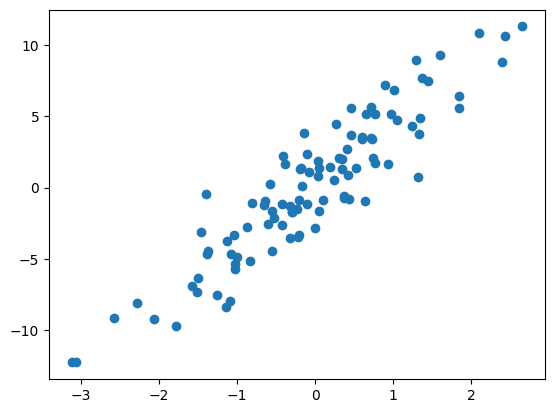

In [3]:
plt.figure()
plt.scatter(X,y)
plt.show()

Exercice 2 : estimez visuellement ce que pourrait $\beta0$ et $\beta1$ ($y=\beta0 + \beta1$*x)

Le nuage de point passe par l'origine donc $\beta0=0$ et en lecture $\beta1=4$

In [4]:
# Affectez ces valeurs aux variables suivantes
b1=4
b0=0

Exercice 3 : définissez une fonction __modele__ qui renvoit y pour chaque X en paramètre selon $\beta0$ et $\beta1$

In [5]:
def modele(X,b0,b1):
    return b0+b1*X

Exercice 4: représentez graphiquement les points et superposez le modèle

In [6]:
X0=-3
Y0=modele(X0,0,b1)

X1=3
Y1=modele(X1,0,b1)

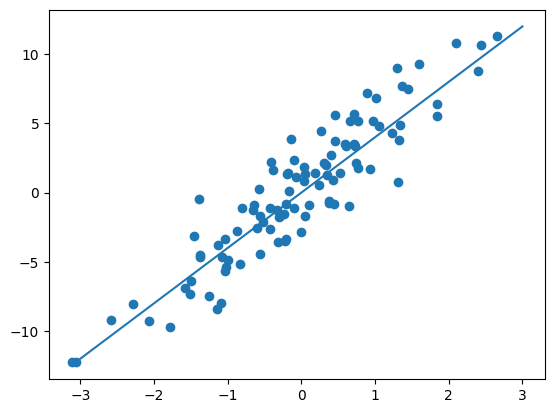

In [7]:
plt.figure()
plt.scatter(X,y)
plt.plot([X0,X1],[Y0,Y1])
plt.show()

Exercice 5 : définissez une fonction de coût RSE2 (nommer la __cout__)

In [8]:
def cout(y,y_pred):
    rse=np.sum((y-y_pred)**2)
    return (1/(len(y)-2))*rse

In [9]:
# La ligne suivante ne devrait pas générée d erreur
assert cout(np.array([0,1,2,3,4,5]),np.array([1,1,2,3,4,6]))==0.5

---
## Nous allons étudier la variation de coût corrélée à nos hyperparamètres

Exercice 6: définissez un array numpy avec 20 valeurs comprises entrer b1 -3  et +3. Appeler le __beta1__

In [11]:
beta1=np.linspace(b1-3,b1+3,num=20)

In [12]:
beta1

array([1.        , 1.31578947, 1.63157895, 1.94736842, 2.26315789,
       2.57894737, 2.89473684, 3.21052632, 3.52631579, 3.84210526,
       4.15789474, 4.47368421, 4.78947368, 5.10526316, 5.42105263,
       5.73684211, 6.05263158, 6.36842105, 6.68421053, 7.        ])

---
Exercice 7 : 
Pour chaque valeur de $\beta1$ générer les y en fonction de X et calculer le cout. (en utilisant notre fonction)<br>
Stocker ce cout dans une structure np.array



<Figure size 640x480 with 0 Axes>

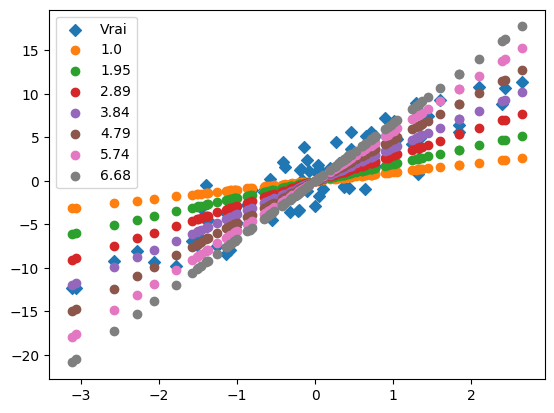

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure()
plt.scatter(X,y,label="Vrai",marker="D")
couts = np.zeros((20))
for i,b1_exp in enumerate(beta1):
    y_pred=modele(X,b0,b1_exp)
    
    couts[i]=cout(y.reshape(-1,1),y_pred)
    if i%3==0:
        plt.scatter(X,y_pred,label=np.round(b1_exp,2))

plt.legend()
plt.figure()

Exercice 8 : représentez les couts ainsi estimés

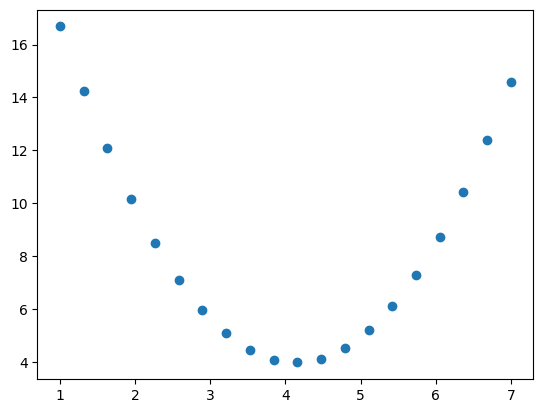

In [22]:
plt.figure()
plt.scatter(beta1[np.arange(20)],couts)
plt.show()

---
Exercice 9 : Que constatez vous et quel est votre conclusion ?

4 est va la valeur avec le plus faible cout